In [9]:
import numpy as np
from matplotlib import pyplot as plt

#import cosmowap libraries
import cosmo_wap as cw
import cosmo_wap.bk as bk #import terms for the bispectrum
import cosmo_wap.pk as pk #import terms for the powerspectrum

# So we need to also define survey specific parameters like biases

In [10]:
# get cosmology from class (default in planck2018)
cosmo = cw.lib.utils.get_cosmo(Omega_m=0.31)

survey_params = cw.survey_params.SurveyParams()

# so we have a bunch of preset surveys
print("Survey specific params:",survey_params.Euclid.__dict__.keys())


#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

Survey specific params: dict_keys(['__module__', '__init__', '__doc__', '__slotnames__'])
Computing bias functions...


AttributeError: type object 'Euclid' has no attribute 'z_range'

### functions have this format
- xxx.lx(cosmo_funcs,kk,zz,t=0)


### So now ecerything is set up - let's plot the monopole

In [4]:
# pick z and k range
zz=1 # redshift
kk = np.linspace(0.001,0.13,500)

In [ ]:
#for monopole 
plt.figure(figsize=(12,8))

#set LOS to t=1/2 - this is the natural choice for your theory for the monopole
t=1/2

#lets plot as fraction of monopole - NPP (Newtonian Plane-Parallel)
norm = np.abs(pk.NPP.l0(cosmo_funcs,kk,zz=1,t=t).real)

#regular newtonian expression
plt.loglog(kk,np.abs(pk.GR2.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='GR2')   # pure GR
plt.loglog(kk,np.abs(pk.WSGR.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='WSGR') #GR/WS mixing
plt.loglog(kk,np.abs(pk.WS.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='WS')     # pure WS

plt.loglog(kk,np.abs(pk.Loc.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Loc')
plt.loglog(kk,np.abs(pk.Eq.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Eq')
plt.loglog(kk,np.abs(pk.Orth.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Orth')
plt.legend()
plt.xlim(0.003,0.13)

plt.ylabel(r'$| P^{\rm term}_0(k)/P^{\rm NPP}_0(k) |$')
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')


In [ ]:
# for dipole
plt.figure(figsize=(12,6))
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_1(k) $[Mpc/h$]^3$')
plt.show()

## Or we can consider the multi-tracer case 

In [7]:
# lets have a bright-faint split for Euclid
F_s = 3e-16
cosmo_funcs = cw.ClassWAP(cosmo,survey_params.Euclid(cosmo).BF_split(F_s),compute_bias=False)

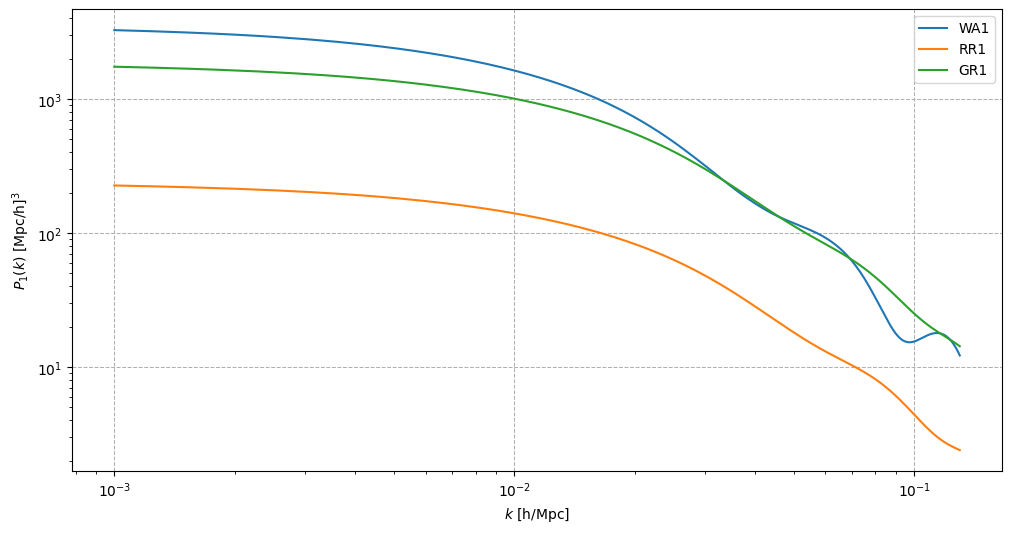

In [8]:
# for dipole - now the GR part does not cancel
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_1(k) $ [Mpc/h$]^3$')
plt.show()